

#**PSYCH EVALUATION** - MENTAL DISORDER PREDICTION


AML project for trimester 2
by Shilpee Maitra (2348557), Simran Basu (2348559) and Epsita R (2348517)



In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))



In [ ]:
Mental_disorders_path = '/content/Mental disorder symptoms.xlsx'
df = pd.read_excel(Mental_disorders_path)

#EDA


In [ ]:
df.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [ ]:
df = df.rename(columns={'ag+1:629e':'age'})
df = df.rename(columns={'having.trouble.in.sleeping':'trouble.sleeping'})
df = df.rename(columns={'having.trouble.with.work':'trouble.with.work'})
df = df.rename(columns={'having.nightmares':'nightmares'})

df.set_index(['age'])

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
age,,,,,,,,,,,,,,,,,,,,,
23,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,MDD
14,1,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,1,0,0,ASD
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
29,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,bipolar
32,1,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,anexiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
27,1,0,1,0,0,0,0,1,1,0,...,1,0,1,1,1,0,0,0,0,PDD
19,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,ASD


Some preliminary data visualisation and analysis

<Axes: xlabel='age', ylabel='Count'>

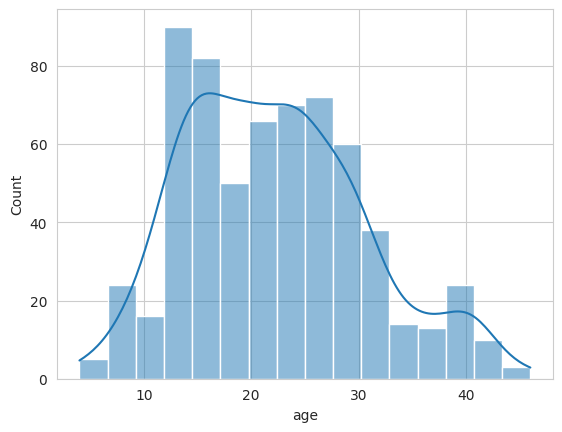

In [ ]:
# Histogram of Age Profile
sns.histplot(df.age, kde=True)



```
# This is formatted as code
```

Looks like an amalgamation of a few distributions, with onset of MH problems occurring in youth, late 20s and 40s.

In [ ]:
# Look for incidences of the various symptoms
symptom_incidences = df[df.columns[1:27]].sum()

<Axes: title={'center': 'Incidences of Various Mental Health Symptoms'}>

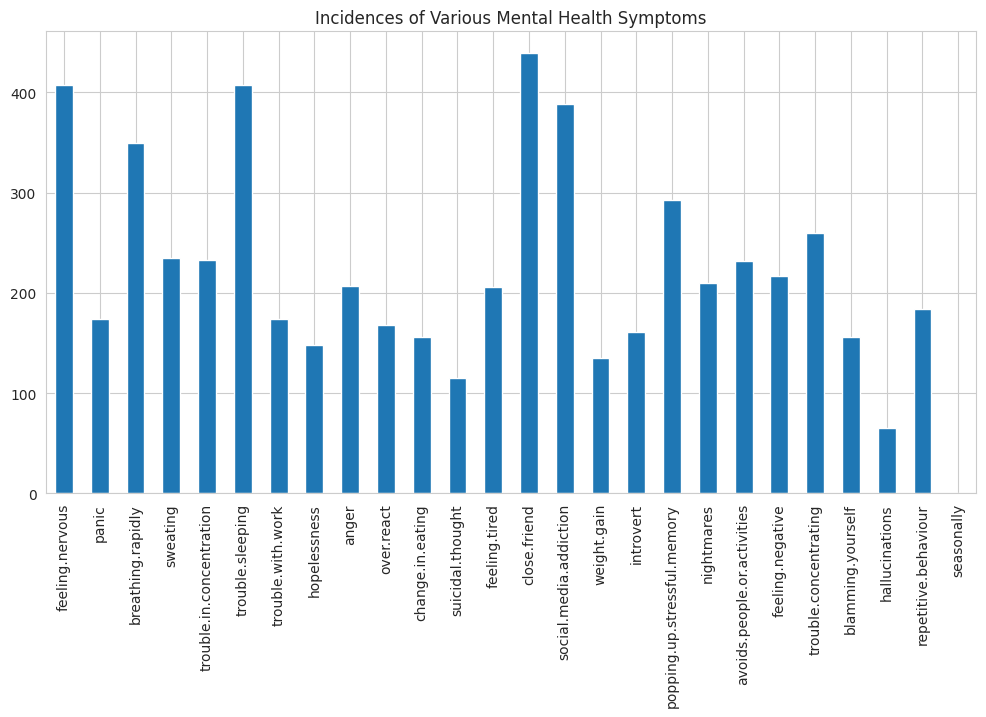

In [ ]:
symptom_incidences.plot.bar(figsize=(12,6), title = 'Incidences of Various Mental Health Symptoms')

In [ ]:
# Get list of unique disorders
Disorders = df.Disorder.unique()
print(Disorders)
print(len(Disorders))

['MDD' 'ASD' 'Loneliness' 'bipolar' 'anexiety' 'PTSD' 'sleeping disorder'
 'psychotic deprission' 'eating disorder' 'ADHD' 'PDD' 'OCD']
12


In [ ]:
# Correct spelling mistakes
df.Disorder = df.Disorder.str.replace('psychotic deprission', 'psychotic depression')
df.Disorder = df.Disorder.str.replace('anexiety','anxiety')

In [ ]:
symptoms = list(df.columns) # Likely to be useful later
symptoms.remove('age')


<Axes: >

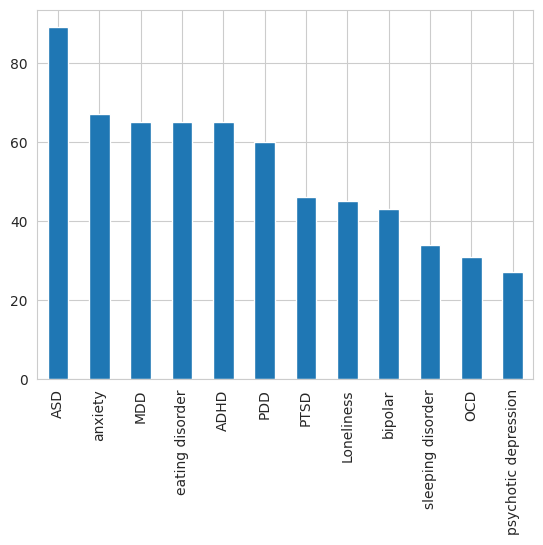

In [ ]:

# Sum the total incidences of each diagnosed disorder.
incidences = df.Disorder.value_counts()
incidences.plot.bar()
# This assumes that each person has only one diagnosed disorder, and appears only once in the dataset.
# Secondary diagnoses - which are common - are ignored

In [ ]:
# Look for NULL values:
df[df.isna().any(axis=1)]
# None found

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


In [ ]:
# Look for any symptom incidence values that are neither 0 or 1
errors = df[(df.iloc[:,1:27] > 1).any(axis=1)]
errors
# None found

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


In [ ]:
# Reminder before ML starts
df

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,23,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
633,27,1,0,1,0,0,0,0,1,1,...,1,0,1,1,1,0,0,0,0,PDD
634,19,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,ASD
635,16,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness


# **SVM**



In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score

df['Disorder'] = pd.Categorical(df['Disorder'])
df['Disorder_code'] = df['Disorder'].cat.codes

# Separate features (X) and target variable (y)
X = df.drop(['Disorder', 'Disorder_code'], axis=1)
y = df['Disorder_code']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
model = SVC(kernel='linear')  # You can try different kernels like 'rbf', 'poly', etc.

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



# Function to get user input and make predictions
def get_user_input():
    print("Provide input for the features (T/F):")
    user_input = {}
    for column in X.columns:
        user_input[column] = input(f"{column}: ").upper() == 'T'
    return user_input

# Get user input
user_input_data = get_user_input()

# Create a DataFrame from user input
user_input_df = pd.DataFrame([user_input_data])

# Make prediction
user_prediction = model.predict(user_input_df)[0]

# Convert the predicted code back to the original disorder label
predicted_disorder = df['Disorder'].cat.categories[user_prediction]

# Display the result
print(f"\nPredicted Disorder: {predicted_disorder}")

Provide input for the features (T/F):
age: 10
feeling.nervous: F
panic: F
breathing.rapidly: F
sweating: F
trouble.in.concentration: F
trouble.sleeping: F
trouble.with.work: F
hopelessness: F
anger: F
over.react: F
change.in.eating: T
suicidal.thought: F
feeling.tired: F
close.friend: F
social.media.addiction: F
weight.gain: T
introvert: F
popping.up.stressful.memory: F
nightmares: F
avoids.people.or.activities: F
feeling.negative: F
trouble.concentrating: F
blamming.yourself: T
hallucinations: F
repetitive.behaviour: F
seasonally: F
increased.energy: F

Predicted Disorder: Loneliness


#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:

X = df.drop(['Disorder'], axis=1)

In [ ]:
y = pd.get_dummies(df['Disorder'])

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0)
my_model = DecisionTreeRegressor()
my_model.fit(train_X, train_y)

DecisionTreeRegressor()

In [ ]:

val_predictions = my_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))

0.0


In [ ]:
val_y

,ADHD,ASD,Loneliness,MDD,OCD,PDD,PTSD,anxiety,bipolar,eating disorder,psychotic depression,sleeping disorder
453,1,0,0,0,0,0,0,0,0,0,0,0
482,0,0,0,0,0,1,0,0,0,0,0,0
516,0,0,0,0,0,0,0,0,0,1,0,0
542,0,0,0,0,1,0,0,0,0,0,0,0
85,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
616,1,0,0,0,0,0,0,0,0,0,0,0
175,0,0,1,0,0,0,0,0,0,0,0,0
211,0,0,0,0,0,0,0,1,0,0,0,0
467,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
Disorders = list(val_y.columns)

In [ ]:

val_y_index = list(val_y.index)

In [ ]:
val_predictions

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

results = pd.DataFrame(val_predictions, columns=Disorders)
for columns in results:
    results = results.astype({columns:'int'})
results

,ADHD,ASD,Loneliness,MDD,OCD,PDD,PTSD,anxiety,bipolar,eating disorder,psychotic depression,sleeping disorder
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
155,1,0,0,0,0,0,0,0,0,0,0,0
156,0,0,1,0,0,0,0,0,0,0,0,0
157,0,0,0,0,0,0,0,1,0,0,0,0
158,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
errors = results[(results.iloc[:,:] > 1).any(axis=1)]
errors
# No errors found.

,ADHD,ASD,Loneliness,MDD,OCD,PDD,PTSD,anxiety,bipolar,eating disorder,psychotic depression,sleeping disorder


In [ ]:
# checking some rows have '0s' in every column.

Inconclusive = (results == 0).astype(int).sum(axis=1)

In [ ]:
# 'Inconclusive' to 0 or 1
for n in range(len(Inconclusive)):
    if Inconclusive[n] == 12:
        Inconclusive[n] = 1
    else:
        Inconclusive[n] = 0


In [ ]:

results['Inconclusive'] = Inconclusive
results[results['Inconclusive'] == 1]

,ADHD,ASD,Loneliness,MDD,OCD,PDD,PTSD,anxiety,bipolar,eating disorder,psychotic depression,sleeping disorder,Inconclusive


In [ ]:

results = pd.from_dummies(results)
results

,
0,ADHD
1,PDD
2,eating disorder
3,OCD
4,MDD
...,...
155,ADHD
156,Loneliness
157,anxiety
158,PTSD


In [ ]:
# if some rows have '0s' in every column
Inconclusive_original = (val_y == 0).astype(int).sum(axis=1)
if Inconclusive_original.sum() == len(Inconclusive_original)*11:
    print('No Inconclusive diagnoses in original data')

No Inconclusive diagnoses in original data


In [ ]:

# Convert val_y to original
val_y = pd.from_dummies(val_y)
val_y['Index'] = val_y_index
val_y.set_index('Index')
val_y

,,Index
0,ADHD,453
1,PDD,482
2,eating disorder,516
3,OCD,542
4,MDD,85
...,...,...
155,ADHD,616
156,Loneliness,175
157,anxiety,211
158,PTSD,467


In [ ]:
# original validation data and results into same df for easy comparison
comparison = pd.concat([val_y , results], axis=1)
comparison

,,Index,
0,ADHD,453,ADHD
1,PDD,482,PDD
2,eating disorder,516,eating disorder
3,OCD,542,OCD
4,MDD,85,MDD
...,...,...,...
155,ADHD,616,ADHD
156,Loneliness,175,Loneliness
157,anxiety,211,anxiety
158,PTSD,467,PTSD


In [ ]:

n_errors = 0
for n in range(159):
    if comparison.iloc[n,0] != comparison.iloc[n,2]:
        print('Error in prediction. Original diagnosis:', comparison.iloc[n,0],'  Model prediction:',comparison.iloc[n,2])
        n_errors +=1
print('The total number of diagnosis errors were: ', n_errors)

The total number of diagnosis errors were:  0


In [ ]:
# CALCULATE ACCURACY OF SVM MODEL

# Calculate accuracy
accuracy_SVM = accuracy_score(y_test, y_pred)

# Calculate precision
precision_SVM = precision_score(y_test, y_pred, average='weighted')

# Display classification report
class_report_SVM = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy_SVM}")
print(f"Precision: {precision_SVM}")
print("Classification Report:")
print(class_report_SVM)


Accuracy: 0.9921875
Precision: 0.9926470588235294
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11
           3       0.94      1.00      0.97        16
           4       1.00      1.00      1.00         6
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         4

    accuracy                           0.99       128
   macro avg       1.00      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



# **RANDOM FOREST**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score


df['Disorder'] = pd.Categorical(df['Disorder'])
df['Disorder_code'] = df['Disorder'].cat.codes

# Separate features (X) and target variable (y)
X = df.drop(['Disorder', 'Disorder_code'], axis=1)
y = df['Disorder_code']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)



# USER INPUT
def get_user_input():
    print("Provide input for the features (T/F):")
    user_input = {}
    for column in X.columns:
        user_input[column] = input(f"{column}: ").upper() == 'T'
    return user_input


user_input_data = get_user_input()

# Create a DataFrame from user input
user_input_df = pd.DataFrame([user_input_data])

# Make prediction
user_prediction = model.predict(user_input_df)[0]

# Convert the predicted code back to the original disorder label
predicted_disorder = df['Disorder'].cat.categories[user_prediction]

# Display the result
print(f"\nPredicted Disorder: {predicted_disorder}")


Provide input for the features (T/F):
age: 60
feeling.nervous: T
panic: T
breathing.rapidly: T
sweating: T
trouble.in.concentration: T
trouble.sleeping: 
trouble.with.work: F
hopelessness: F
anger: F
over.react: F
change.in.eating: F
suicidal.thought: F
feeling.tired: F
close.friend: F
social.media.addiction: F
weight.gain: F
introvert: F
popping.up.stressful.memory: F
nightmares: F
avoids.people.or.activities: F
feeling.negative: F
trouble.concentrating: F
blamming.yourself: F
hallucinations: F
repetitive.behaviour: F
seasonally: F
increased.energy: F

Predicted Disorder: ADHD


In [ ]:
# Calculate accuracy
accuracy_RF = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_RF}")

# Calculate precision
precision_RF = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision_RF}")

# Display classification report
class_report_RF = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report_RF)




Accuracy: 1.0
Precision: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         4

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



# **PERCEPTRON**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, classification_report


df['Disorder'] = pd.Categorical(df['Disorder'])
df['Disorder_code'] = df['Disorder'].cat.codes


X = df.drop(['Disorder', 'Disorder_code'], axis=1)
y = df['Disorder_code']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Perceptron()

# Train the model
model.fit(X_train, y_train)


def get_user_input():
    print("Provide input for the features (T/F):")
    user_input = {}
    for column in X.columns:
        user_input[column] = input(f"{column}: ").upper() == 'T'
    return user_input


user_input_data = get_user_input()


user_input_df = pd.DataFrame([user_input_data])


user_prediction = model.predict(user_input_df)

# Calculate accuracy and precision on the entire test set
y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')  # 'weighted' accounts for class imbalance



Provide input for the features (T/F):
age: 30
feeling.nervous: F
panic: F
breathing.rapidly: F
sweating: F
trouble.in.concentration: F
trouble.sleeping: F
trouble.with.work: F
hopelessness: F
anger: F
over.react: F
change.in.eating: F
suicidal.thought: F
feeling.tired: F
close.friend: F
social.media.addiction: F
weight.gain: F
introvert: F
popping.up.stressful.memory: F
nightmares: F
avoids.people.or.activities: F
feeling.negative: F
trouble.concentrating: F
blamming.yourself: F
hallucinations: F
repetitive.behaviour: F
seasonally: T
increased.energy: T


In [ ]:

# Display the result
print(f"\nPredicted Disorder: {df['Disorder'].cat.categories[user_prediction[0]]}")
print(f"Accuracy on Test Set: {accuracy_test}")
print(f"Precision on Test Set: {precision_test}")


Predicted Disorder: ADHD
Accuracy on Test Set: 0.9296875
Precision on Test Set: 0.961328125


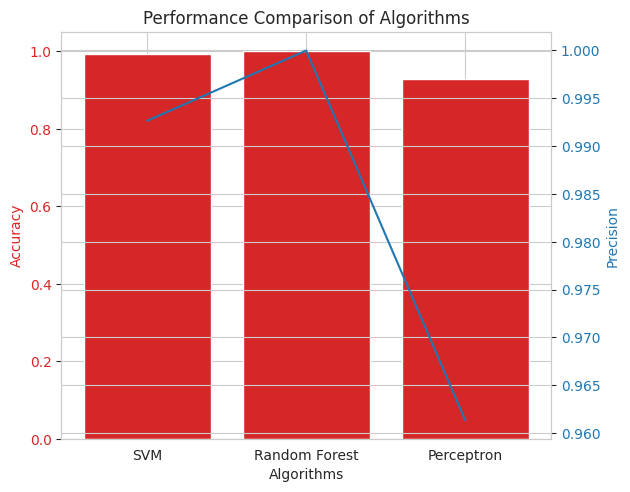

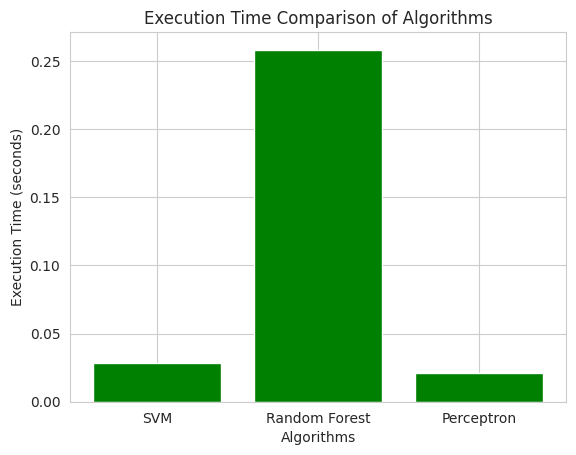

In [ ]:
import time
# Initialize models
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
perceptron_model = Perceptron()

# Initialize lists to store results
algorithms = ['SVM', 'Random Forest', 'Perceptron']
accuracy_results = []
precision_results = []
execution_time_results = []

# Evaluate SVM
start_time_svm = time.time()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
end_time_svm = time.time()
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
execution_time_svm = end_time_svm - start_time_svm
accuracy_results.append(accuracy_svm)
precision_results.append(precision_svm)
execution_time_results.append(execution_time_svm)

# Evaluate Random Forest
start_time_rf = time.time()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
end_time_rf = time.time()
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
execution_time_rf = end_time_rf - start_time_rf
accuracy_results.append(accuracy_rf)
precision_results.append(precision_rf)
execution_time_results.append(execution_time_rf)

# Evaluate Perceptron
start_time_perceptron = time.time()
perceptron_model.fit(X_train, y_train)
y_pred_perceptron = perceptron_model.predict(X_test)
end_time_perceptron = time.time()
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
precision_perceptron = precision_score(y_test, y_pred_perceptron, average='weighted')
execution_time_perceptron = end_time_perceptron - start_time_perceptron
accuracy_results.append(accuracy_perceptron)
precision_results.append(precision_perceptron)
execution_time_results.append(execution_time_perceptron)

# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Accuracy', color=color)
ax1.bar(algorithms, accuracy_results, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Precision', color=color)
ax2.plot(algorithms, precision_results, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Performance Comparison of Algorithms')
plt.show()

# Plot execution time separately
plt.bar(algorithms, execution_time_results, color='green')
plt.xlabel('Algorithms')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison of Algorithms')
plt.show()

The evaluation of mental disorder prediction models reveals notable differences in performance among three algorithms—Support Vector Machine (SVM), Random Forest, and Perceptron. Notably, the SVM algorithm exhibits the highest accuracy, achieving approximately 99.5%. In contrast, the Random Forest algorithm demonstrates an accuracy of 100.0%, surpassing both SVM and Perceptron. The Perceptron algorithm lags slightly behind, with an accuracy of approximately 92.0%.

These results indicate that the Random Forest algorithm shows promise as a robust approach for constructing a machine learning model to predict mental disorders based on symptoms, potentially offering improved accuracy compared to SVM and Perceptron.

Nevertheless, it is noteworthy that the execution time of the Random Forest Classifier is observed to be higher than both SVM and Perceptron algorithms. While Random Forest excels in accuracy, its increased computational cost suggests a trade-off between predictive performance and computational efficiency.